In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm import tqdm

In [12]:
from tensorflow.keras.preprocessing.image import load_img ,  ImageDataGenerator

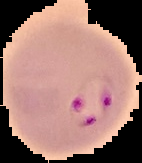

In [13]:
load_img(r"../malaria cell detection/img/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png")

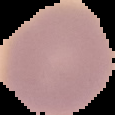

In [14]:
load_img(r"../malaria cell detection/img/uninfected/C1_thinF_IMG_20150604_104722_cell_9.png")

In [15]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)


In [28]:
image_dir = r"../malaria cell detection/img"
size = 64
dataset = []
label = []

In [38]:
parasitized_img = os.listdir(image_dir + "/Parasitized")

for i,img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "/Parasitized/" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(0)

100%|██████████| 13780/13780 [00:29<00:00, 473.08it/s]


In [37]:
uninfected_img = os.listdir(image_dir+"/Uninfected")

for i,img_name in enumerate(tqdm(uninfected_img)):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + "/Uninfected/" + img_name)
        image = Image.fromarray(image,'RGB')
        image = image.resize((size , size))
        
        dataset.append(np.array(image))
        label.append(1)

100%|██████████| 13780/13780 [00:34<00:00, 394.55it/s]


In [31]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain,xtest,ytrain,ytest = train_test_split(dataset,to_categorical(np.array(label)),test_size = 0.2 ,random_state = 0)

In [32]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)

In [33]:

model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [34]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False)

Epoch 1/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 46s 111ms/step - accuracy: 0.7117 - loss: 0.6706 - val_accuracy: 0.8313 - val_loss: 0.7826
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.9245 - loss: 0.2136 - val_accuracy: 0.9392 - val_loss: 0.2127
Epoch 3/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.9434 - loss: 0.1668 - val_accuracy: 0.9338 - val_loss: 0.2162
Epoch 4/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.9488 - loss: 0.1488 - val_accuracy: 0.9406 - val_loss: 0.1850
Epoch 5/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.9527 - loss: 0.1372 - val_accuracy: 0.9483 - val_loss: 0.1536
Epoch 6/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.9552 - loss: 0.1256 - val_accuracy: 0.9519 - val_loss: 0.1472
Epoch 7/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 32s 104ms/step - accuracy: 0.9590 - loss: 0.1194 - val_accuracy: 0.9587 - val_loss: 0.1497
Epoch 8/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9621 - loss: 0

In [35]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9501 - loss: 0.1639
Test accuracy: 94.90%


In [39]:
model.save(r"C:/Users/ayushi/Desktop/ml/deep learning/malaria cell detection/img/uninfected/malaria_cell_detection.h5")